In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.7f}'.format
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('borough_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GSS_CODE                          33 non-null     object 
 1   London_borough                    33 non-null     object 
 2   housing_price                     33 non-null     int64  
 3   Personal_wellbeing_average_score  33 non-null     float64
 4   mean_income                       33 non-null     int64  
 5   median_income                     33 non-null     int64  
 6   employment_rate                   33 non-null     float64
 7   population                        33 non-null     int64  
 8   OA_percentage_metro               33 non-null     float64
 9   OA_percentage_walk                33 non-null     float64
 10  fertility_rate                    33 non-null     int64  
 11  gcse_results                      33 non-null     float64
 12  IMD_score 

In [4]:
df.head()

,GSS_CODE,London_borough,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
0,E09000001,City of London,797505,3.1000000,128000,54200,87.2000000,9721,14.3300000,40.1700000,60,53.0000000,11.1500000
1,E09000002,Barking & Dagenham,298338,2.8200000,29400,25700,69.8000000,212906,13.0100000,3.7100000,77,49.7000000,34.2000000
2,E09000003,Barnet,520524,3.1900000,51600,30700,73.9000000,395869,17.3200000,4.1000000,62,60.1000000,16.6400000
3,E09000004,Bexley,336988,3.2100000,36000,28000,75.6000000,248287,1.6700000,3.7000000,60,53.5000000,16.7100000
4,E09000005,Brent,474732,2.4000000,37800,26200,72.8000000,329771,18.1500000,4.5600000,73,53.1000000,30.5000000


In [5]:
df.describe()

,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
count,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000,33.0000000
mean,"523,239.8484848",3.0990909,"57,169.6969697","32,233.3333333",74.8515152,"271,575.4242424",14.7106061,6.8566667,59.3636364,53.2757576,24.9021212
std,"198,491.1242241",0.3121735,"32,643.5434356","5,898.4461231",4.6778147,"75,869.6274906",7.0788042,6.4274036,10.7407465,3.3078534,9.1937995
min,"298,338.0000000",2.3400000,"29,400.0000000","24,600.0000000",65.9000000,"9,721.0000000",1.6700000,3.6400000,37.0000000,48.4000000,10.1200000
25%,"401,072.0000000",2.9600000,"38,500.0000000","28,300.0000000",71.4000000,"242,467.0000000",9.5600000,4.1000000,51.0000000,50.2000000,16.6400000
50%,"472,620.0000000",3.1000000,"47,200.0000000","30,200.0000000",75.2000000,"276,983.0000000",16.5000000,4.8500000,61.0000000,53.1000000,24.5900000
75%,"554,933.0000000",3.3000000,"55,300.0000000","33,700.0000000",78.2000000,"326,034.0000000",20.9500000,7.3900000,67.0000000,54.5000000,31.2400000
max,"1,241,423.0000000",3.6900000,"185,000.0000000","54,200.0000000",87.2000000,"395,869.0000000",26.6500000,40.1700000,77.0000000,61.3000000,42.8900000


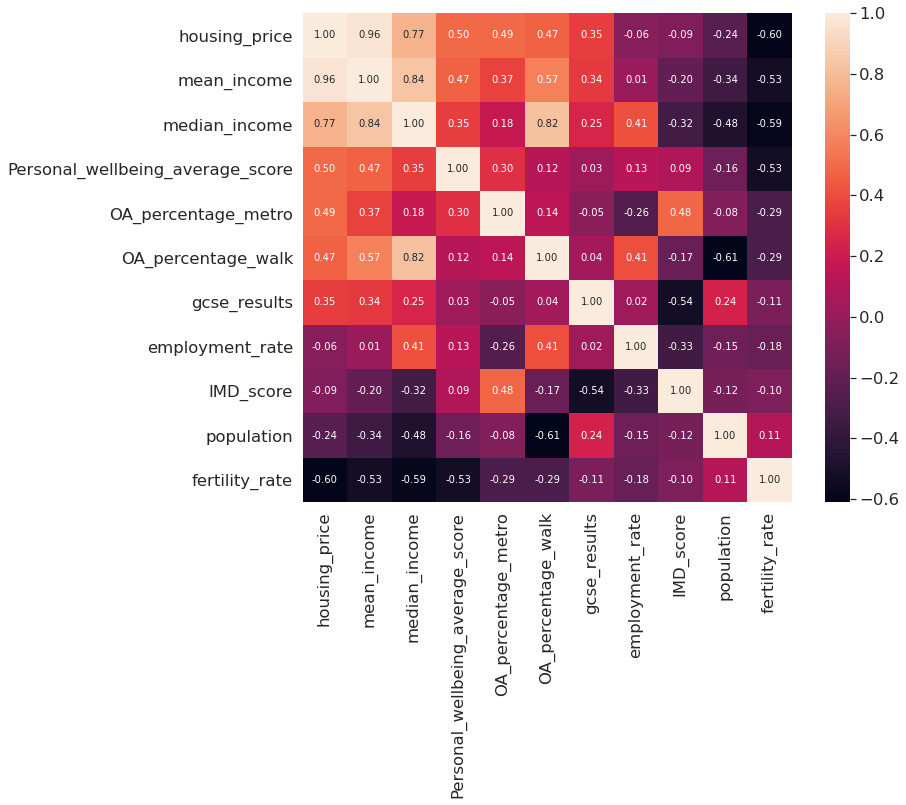

In [6]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df.corrwith(df.housing_price)

housing_price                                                     1.0000000
Personal_wellbeing_average_score                                  0.4961117
mean_income                                                       0.9631177
median_income                                                     0.7658673
employment_rate                                                  -0.0642372
population                                                       -0.2425747
OA_percentage_metro                                               0.4943785
OA_percentage_walk                                                0.4711904
fertility_rate                                                   -0.6016694
gcse_results                                                      0.3492101
IMD_score                                                        -0.0916920
dtype: float64

In [8]:
# forward selection
df_1 = df.loc[:,['housing_price', 'mean_income']]

model_1 = sm.formula.ols('housing_price ~ mean_income', df_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     397.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.12e-19
Time:                        12:05:17   Log-Likelihood:                -405.55
No. Observations:                  33   AIC:                             815.1
Df Residuals:                      31   BIC:                             818.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.884e+05   1.93e+04      9.777      0.000    1.49e+05    2.28e+05
mean_income     5.8563      0.294     19.929      0.000       5.257       6.456
==============================================================================
Omnibus:                        0.193   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.075
Skew:                          -0.104   Prob(JB):                        0.963
Kurtosis:                       2.892   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df_2 = df.loc[:,['housing_price', 'median_income']]

model_2 = sm.formula.ols('housing_price ~ median_income', df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     43.98
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.06e-07
Time:                        12:05:18   Log-Likelihood:                -434.29
No. Observations:                  33   AIC:                             872.6
Df Residuals:                      31   BIC:                             875.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.075e+05   1.27e+05     -2.416      0.022   -5.67e+05   -4.79e+04
median_income    25.7725      3.886      6.632      0.000      17.846      33.699
==============================================================================
Omnibus:                       19.448   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.535
Skew:                           1.354   Prob(JB):                     5.22e-08
Kurtosis:                       7.130   Cond. No.                     1.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df_3 = df.loc[:,['housing_price', 'Personal_wellbeing_average_score']]

model_3 = sm.formula.ols('housing_price ~ Personal_wellbeing_average_score', df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     10.12
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00332
Time:                        12:05:19   Log-Likelihood:                -444.21
No. Observations:                  33   AIC:                             892.4
Df Residuals:                      31   BIC:                             895.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -4.544e+05   3.09e+05     -1.471      0.151   -1.08e+06    1.75e+05
Personal_wellbeing_average_score  3.154e+05   9.92e+04      3.181      0.003    1.13e+05    5.18e+05
==============================================================================
Omnibus:                       10.701   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.628
Skew:                           1.166   Prob(JB):                      0.00811
Kurtosis:                       4.250   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df_4 = df.loc[:,['housing_price', 'OA_percentage_metro']]

model_4 = sm.formula.ols('housing_price ~ OA_percentage_metro', df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     10.03
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00345
Time:                        12:05:20   Log-Likelihood:                -444.24
No. Observations:                  33   AIC:                             892.5
Df Residuals:                      31   BIC:                             895.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.193e+05   7.13e+04      4.481      0.000    1.74e+05    4.65e+05
OA_percentage_metro  1.386e+04   4377.674      3.167      0.003    4934.150    2.28e+04
==============================================================================
Omnibus:                       18.246   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.923
Skew:                           1.486   Prob(JB):                     6.39e-06
Kurtosis:                       5.926   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
df_5 = df.loc[:,['housing_price', 'OA_percentage_walk']]

model_5 = sm.formula.ols('housing_price ~ OA_percentage_walk', df_5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     8.847
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00564
Time:                        12:05:21   Log-Likelihood:                -444.73
No. Observations:                  33   AIC:                             893.5
Df Residuals:                      31   BIC:                             896.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.235e+05   4.57e+04      9.276      0.000     3.3e+05    5.17e+05
OA_percentage_walk  1.455e+04   4892.252      2.974      0.006    4573.492    2.45e+04
==============================================================================
Omnibus:                       32.321   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.920
Skew:                           2.242   Prob(JB):                     1.20e-17
Kurtosis:                       9.046   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df_6 = df.loc[:,['housing_price', 'gcse_results']]

model_6 = sm.formula.ols('housing_price ~ gcse_results', df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     4.305
Date:                Mon, 30 Jan 2023   Prob (F-statistic):             0.0464
Time:                        12:05:22   Log-Likelihood:                -446.72
No. Observations:                  33   AIC:                             897.4
Df Residuals:                      31   BIC:                             900.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.931e+05   5.39e+05     -1.100      0.280   -1.69e+06    5.06e+05
gcse_results  2.095e+04   1.01e+04      2.075      0.046     357.862    4.16e+04
==============================================================================
Omnibus:                       16.215   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.803
Skew:                           1.420   Prob(JB):                     8.26e-05
Kurtosis:                       5.368   Cond. No.                         875.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
df_7 = df.loc[:,['housing_price', 'employment_rate']]

model_7 = sm.formula.ols('housing_price ~ employment_rate', df_7).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.1284
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.722
Time:                        12:05:22   Log-Likelihood:                -448.80
No. Observations:                  33   AIC:                             901.6
Df Residuals:                      31   BIC:                             904.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.273e+05    5.7e+05      1.275      0.212   -4.36e+05    1.89e+06
employment_rate -2725.7435   7605.352     -0.358      0.722   -1.82e+04    1.28e+04
==============================================================================
Omnibus:                       21.564   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.358
Skew:                           1.755   Prob(JB):                     2.56e-07
Kurtosis:                       6.125   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df_8 = df.loc[:,['housing_price', 'IMD_score']]

model_8 = sm.formula.ols('housing_price ~ IMD_score', df_8).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.2628
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.612
Time:                        12:05:23   Log-Likelihood:                -448.73
No. Observations:                  33   AIC:                             901.5
Df Residuals:                      31   BIC:                             904.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.725e+05   1.02e+05      5.596      0.000    3.64e+05    7.81e+05
IMD_score  -1979.5993   3861.285     -0.513      0.612   -9854.742    5895.543
==============================================================================
Omnibus:                       24.362   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.068
Skew:                           1.886   Prob(JB):                     3.29e-09
Kurtosis:                       6.766   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df_9 = df.loc[:,['housing_price', 'population']]

model_9 = sm.formula.ols('housing_price ~ population', df_9).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.938
Date:                Mon, 30 Jan 2023   Prob (F-statistic):              0.174
Time:                        12:05:23   Log-Likelihood:                -447.87
No. Observations:                  33   AIC:                             899.7
Df Residuals:                      31   BIC:                             902.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.956e+05   1.28e+05      5.417      0.000    4.34e+05    9.57e+05
population    -0.6346      0.456     -1.392      0.174      -1.564       0.295
==============================================================================
Omnibus:                       22.973   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.640
Skew:                           1.816   Prob(JB):                     3.01e-08
Kurtosis:                       6.464   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df_10 = df.loc[:,['housing_price', 'fertility_rate']]

model_10 = sm.formula.ols('housing_price ~ fertility_rate', df_10).fit()
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     17.59
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           0.000212
Time:                        12:05:24   Log-Likelihood:                -441.45
No. Observations:                  33   AIC:                             886.9
Df Residuals:                      31   BIC:                             889.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.183e+06    1.6e+05      7.402      0.000    8.57e+05    1.51e+06
fertility_rate -1.112e+04   2651.148     -4.194      0.000   -1.65e+04   -5711.918
==============================================================================
Omnibus:                       28.581   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.463
Skew:                           1.966   Prob(JB):                     1.66e-14
Kurtosis:                       8.541   Cond. No.                         344.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df_11 = df.loc[:,['housing_price', 'mean_income','median_income']]

model_11 = sm.formula.ols('housing_price ~ mean_income + median_income', df_11).fit()
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     207.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.74e-18
Time:                        12:05:24   Log-Likelihood:                -404.38
No. Observations:                  33   AIC:                             814.8
Df Residuals:                      30   BIC:                             819.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.898e+05   7.11e+04      4.078      0.000    1.45e+05    4.35e+05
mean_income       6.5045      0.524     12.402      0.000       5.433       7.576
median_income    -4.2952      2.903     -1.480      0.149     -10.223       1.633
==============================================================================
Omnibus:                        2.210   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.396
Skew:                           0.229   Prob(JB):                        0.497
Kurtosis:                       2.102   Cond. No.                     5.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
df_12 = df.loc[:,['housing_price', 'mean_income','Personal_wellbeing_average_score']]

model_12 = sm.formula.ols('housing_price ~ mean_income + Personal_wellbeing_average_score', df_12).fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.72e-18
Time:                        12:05:25   Log-Likelihood:                -404.98
No. Observations:                  33   AIC:                             816.0
Df Residuals:                      30   BIC:                             820.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         8.741e+04   1.01e+05      0.868      0.392   -1.18e+05    2.93e+05
mean_income                          5.6966      0.333     17.124      0.000       5.017       6.376
Personal_wellbeing_average_score  3.555e+04   3.48e+04      1.022      0.315   -3.55e+04    1.07e+05
==============================================================================
Omnibus:                        0.050   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.183
Skew:                           0.082   Prob(JB):                        0.913
Kurtosis:                       2.674   Cond. No.                     7.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
df_13 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro']]

model_13 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro', df_13).fit()
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     287.1
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.75e-20
Time:                        12:05:25   Log-Likelihood:                -399.32
No. Observations:                  33   AIC:                             804.6
Df Residuals:                      30   BIC:                             809.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.423e+05   2.05e+04      6.956      0.000       1e+05    1.84e+05
mean_income             5.4937      0.266     20.653      0.000       4.950       6.037
OA_percentage_metro  4548.1132   1226.662      3.708      0.001    2042.935    7053.292
==============================================================================
Omnibus:                        1.477   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                0.608
Skew:                          -0.276   Prob(JB):                        0.738
Kurtosis:                       3.372   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df_14 = df.loc[:,['housing_price', 'mean_income','OA_percentage_walk']]

model_14 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_walk', df_14).fit()
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     224.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           9.04e-19
Time:                        12:05:26   Log-Likelihood:                -403.17
No. Observations:                  33   AIC:                             812.3
Df Residuals:                      30   BIC:                             816.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.899e+05   1.82e+04     10.413      0.000    1.53e+05    2.27e+05
mean_income            6.2759      0.339     18.504      0.000       5.583       6.969
OA_percentage_walk -3718.0251   1722.523     -2.158      0.039   -7235.886    -200.164
==============================================================================
Omnibus:                        3.610   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.171
Skew:                           0.402   Prob(JB):                        0.338
Kurtosis:                       2.034   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df_15 = df.loc[:,['housing_price', 'mean_income','gcse_results']]

model_15 = sm.formula.ols('housing_price ~ mean_income + gcse_results', df_15).fit()
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.77e-18
Time:                        12:05:27   Log-Likelihood:                -405.38
No. Observations:                  33   AIC:                             816.8
Df Residuals:                      30   BIC:                             821.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.001e+05   1.61e+05      0.622      0.539   -2.29e+05    4.29e+05
mean_income      5.7977      0.316     18.372      0.000       5.153       6.442
gcse_results  1720.8453   3114.286      0.553      0.585   -4639.376    8081.067
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.062
Skew:                          -0.034   Prob(JB):                        0.970
Kurtosis:                       2.799   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
df_16 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_16 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_16).fit()
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     229.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.48e-19
Time:                        12:05:27   Log-Likelihood:                -402.80
No. Observations:                  33   AIC:                             811.6
Df Residuals:                      30   BIC:                             816.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.48e+05   7.08e+04      4.917      0.000    2.03e+05    4.93e+05
mean_income        5.4536      0.325     16.800      0.000       4.791       6.117
fertility_rate -2300.0592    986.603     -2.331      0.027   -4314.970    -285.148
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.675
Skew:                          -0.011   Prob(JB):                        0.714
Kurtosis:                       2.300   Cond. No.                     5.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df_17 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','median_income']]

model_17 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + median_income', df_17).fit()
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     189.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.76e-19
Time:                        12:05:28   Log-Likelihood:                -398.93
No. Observations:                  33   AIC:                             805.9
Df Residuals:                      29   BIC:                             811.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.959e+05   6.73e+04      2.911      0.007    5.82e+04    3.34e+05
mean_income             5.8406      0.493     11.843      0.000       4.832       6.849
OA_percentage_metro  4286.9891   1271.687      3.371      0.002    1686.097    6887.881
median_income          -2.1606      2.581     -0.837      0.409      -7.440       3.119
==============================================================================
Omnibus:                        0.043   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.054
Skew:                           0.019   Prob(JB):                        0.973
Kurtosis:                       2.805   Cond. No.                     6.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
df_18 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','Personal_wellbeing_average_score']]

model_18 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + Personal_wellbeing_average_score', df_18).fit()
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.30e-19
Time:                        12:05:28   Log-Likelihood:                -399.08
No. Observations:                  33   AIC:                             806.2
Df Residuals:                      29   BIC:                             812.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         8.812e+04   8.57e+04      1.028      0.312   -8.71e+04    2.63e+05
mean_income                          5.4160      0.294     18.427      0.000       4.815       6.017
OA_percentage_metro               4424.1690   1253.152      3.530      0.001    1861.185    6987.153
Personal_wellbeing_average_score  1.949e+04   2.99e+04      0.651      0.520   -4.17e+04    8.07e+04
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.097
Skew:                          -0.115   Prob(JB):                        0.953
Kurtosis:                       3.133   Cond. No.                     7.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
df_19 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','OA_percentage_walk']]

model_19 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + OA_percentage_walk', df_19).fit()
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     218.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           5.29e-20
Time:                        12:05:29   Log-Likelihood:                -396.70
No. Observations:                  33   AIC:                             801.4
Df Residuals:                      29   BIC:                             807.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.459e+05   1.93e+04      7.569      0.000    1.06e+05    1.85e+05
mean_income             5.8772      0.303     19.396      0.000       5.258       6.497
OA_percentage_metro  4316.3440   1156.801      3.731      0.001    1950.421    6682.267
OA_percentage_walk  -3234.9026   1445.879     -2.237      0.033   -6192.057    -277.748
==============================================================================
Omnibus:                        0.752   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.599
Skew:                           0.315   Prob(JB):                        0.741
Kurtosis:                       2.803   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
df_20 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','gcse_results']]

model_20 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + gcse_results', df_20).fit()
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     199.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.85e-19
Time:                        12:05:30   Log-Likelihood:                -398.12
No. Observations:                  33   AIC:                             804.2
Df Residuals:                      29   BIC:                             810.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -5.86e+04   1.37e+05     -0.427      0.673   -3.39e+05    2.22e+05
mean_income             5.3333      0.283     18.877      0.000       4.755       5.911
OA_percentage_metro  4918.6126   1228.914      4.002      0.000    2405.202    7432.023
gcse_results         3839.9136   2596.806      1.479      0.150   -1471.151    9150.978
==============================================================================
Omnibus:                        0.562   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.082
Skew:                          -0.093   Prob(JB):                        0.960
Kurtosis:                       3.157   Cond. No.                     1.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
df_21 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate']]

model_21 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate', df_21).fit()
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     220.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.59e-20
Time:                        12:05:30   Log-Likelihood:                -396.53
No. Observations:                  33   AIC:                             801.1
Df Residuals:                      29   BIC:                             807.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.796e+05   6.24e+04      4.480      0.000    1.52e+05    4.07e+05
mean_income             5.1810      0.283     18.305      0.000       4.602       5.760
OA_percentage_metro  4227.3115   1154.848      3.660      0.001    1865.382    6589.241
fertility_rate      -1932.3218    835.955     -2.312      0.028   -3642.042    -222.602
==============================================================================
Omnibus:                        3.233   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.939
Skew:                          -0.528   Prob(JB):                        0.379
Kurtosis:                       3.545   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
df_22 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','median_income']]

model_22 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + median_income', df_22).fit()
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     181.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.39e-19
Time:                        12:05:31   Log-Likelihood:                -394.54
No. Observations:                  33   AIC:                             799.1
Df Residuals:                      28   BIC:                             806.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.349e+05   1.01e+05      4.286      0.000    2.27e+05    6.43e+05
mean_income             5.8362      0.439     13.281      0.000       4.936       6.736
OA_percentage_metro  3572.4187   1159.212      3.082      0.005    1197.882    5946.956
fertility_rate      -2494.1395    854.068     -2.920      0.007   -4243.619    -744.659
median_income          -4.6469      2.452     -1.895      0.068      -9.670       0.377
==============================================================================
Omnibus:                        0.673   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.139
Skew:                          -0.129   Prob(JB):                        0.933
Kurtosis:                       3.186   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
df_23 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','Personal_wellbeing_average_score']]

model_23 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + Personal_wellbeing_average_score', df_23).fit()
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           7.39e-19
Time:                        12:05:32   Log-Likelihood:                -396.52
No. Observations:                  33   AIC:                             803.0
Df Residuals:                      28   BIC:                             810.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.959e+05   1.25e+05      2.363      0.025    3.94e+04    5.52e+05
mean_income                          5.1910      0.296     17.565      0.000       4.586       5.796
OA_percentage_metro               4247.9966   1182.780      3.592      0.001    1825.181    6670.812
fertility_rate                   -1982.8181    913.863     -2.170      0.039   -3854.782    -110.854
Personal_wellbeing_average_score -4571.6233   3.03e+04     -0.151      0.881   -6.66e+04    5.75e+04
==============================================================================
Omnibus:                        3.941   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.504
Skew:                          -0.588   Prob(JB):                        0.286
Kurtosis:                       3.663   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
df_24 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk']]

model_24 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk', df_24).fit()
model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           5.48e-20
Time:                        12:05:32   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             796.9
Df Residuals:                      28   BIC:                             804.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.818e+05   5.78e+04      4.873      0.000    1.63e+05       4e+05
mean_income             5.5636      0.307     18.126      0.000       4.935       6.192
OA_percentage_metro  4001.1071   1074.430      3.724      0.001    1800.237    6201.977
fertility_rate      -1913.3200    774.787     -2.469      0.020   -3500.400    -326.240
OA_percentage_walk  -3201.2615   1333.482     -2.401      0.023   -5932.775    -469.748
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df_25 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','gcse_results']]

model_25 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + gcse_results', df_25).fit()
model_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     178.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.74e-19
Time:                        12:05:33   Log-Likelihood:                -394.81
No. Observations:                  33   AIC:                             799.6
Df Residuals:                      28   BIC:                             807.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.592e+04   1.36e+05      0.485      0.631   -2.12e+05    3.44e+05
mean_income             4.9917      0.294     16.982      0.000       4.390       5.594
OA_percentage_metro  4618.4001   1137.652      4.060      0.000    2288.025    6948.775
fertility_rate      -2018.0571    809.016     -2.494      0.019   -3675.251    -360.863
gcse_results         4200.8247   2394.847      1.754      0.090    -704.797    9106.447
==============================================================================
Omnibus:                        1.952   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.034
Skew:                          -0.406   Prob(JB):                        0.596
Kurtosis:                       3.307   Cond. No.                     1.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
df_26 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','median_income']]

model_26 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + median_income', df_26).fit()
model_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           8.21e-19
Time:                        12:05:34   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             798.9
Df Residuals:                      27   BIC:                             807.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.819e+05    1.5e+05      1.875      0.072   -2.65e+04     5.9e+05
mean_income             5.5637      0.477     11.669      0.000       4.585       6.542
OA_percentage_metro  4000.9873   1184.379      3.378      0.002    1570.843    6431.132
fertility_rate      -1913.4565    943.041     -2.029      0.052   -3848.417      21.504
OA_percentage_walk  -3200.7549   2348.686     -1.363      0.184   -8019.860    1618.351
median_income          -0.0011      4.178     -0.000      1.000      -8.574       8.572
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     1.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
df_27 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','Personal_wellbeing_average_score']]

model_27 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + Personal_wellbeing_average_score', df_27).fit()
model_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     152.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           6.50e-19
Time:                        12:05:34   Log-Likelihood:                -393.16
No. Observations:                  33   AIC:                             798.3
Df Residuals:                      27   BIC:                             807.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3.517e+05   1.17e+05      2.997      0.006    1.11e+05    5.93e+05
mean_income                          5.6307      0.325     17.328      0.000       4.964       6.297
OA_percentage_metro               4075.4369   1090.114      3.739      0.001    1838.708    6312.165
fertility_rate                   -2128.3343    842.596     -2.526      0.018   -3857.199    -399.470
OA_percentage_walk               -3402.7581   1377.887     -2.470      0.020   -6229.948    -575.569
Personal_wellbeing_average_score -1.957e+04   2.85e+04     -0.686      0.498   -7.81e+04    3.89e+04
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   2.301
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.012
Skew:                          -0.257   Prob(JB):                        0.603
Kurtosis:                       3.687   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
df_28 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results']]

model_28 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results', df_28).fit()
model_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.39e-19
Time:                        12:05:35   Log-Likelihood:                -392.36
No. Observations:                  33   AIC:                             796.7
Df Residuals:                      27   BIC:                             805.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.218e+05   1.31e+05      0.928      0.362   -1.48e+05    3.91e+05
mean_income             5.3742      0.333     16.125      0.000       4.690       6.058
OA_percentage_metro  4321.8362   1085.006      3.983      0.000    2095.588    6548.085
fertility_rate      -1979.8066    765.105     -2.588      0.015   -3549.672    -409.941
OA_percentage_walk  -2801.0043   1346.963     -2.079      0.047   -5564.744     -37.264
gcse_results         3141.2734   2320.829      1.354      0.187   -1620.674    7903.221
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.134
Skew:                           0.000   Prob(JB):                        0.935
Kurtosis:                       3.312   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
df_29 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','median_income']]

model_29 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + median_income', df_29).fit()
model_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     128.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.48e-18
Time:                        12:05:36   Log-Likelihood:                -392.34
No. Observations:                  33   AIC:                             798.7
Df Residuals:                      26   BIC:                             809.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.451e+05    1.8e+05      0.807      0.427   -2.24e+05    5.15e+05
mean_income             5.4397      0.479     11.360      0.000       4.455       6.424
OA_percentage_metro  4241.0853   1180.731      3.592      0.001    1814.059    6668.112
fertility_rate      -2080.9749    937.632     -2.219      0.035   -4008.305    -153.645
OA_percentage_walk  -2422.4021   2385.901     -1.015      0.319   -7326.691    2481.887
gcse_results         3208.0532   2388.284      1.343      0.191   -1701.136    8117.242
median_income          -0.8069      4.161     -0.194      0.848      -9.360       7.746
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.104
Skew:                          -0.007   Prob(JB):                        0.949
Kurtosis:                       3.275   Cond. No.                     1.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
df_30 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score']]

model_30 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score', df_30).fit()
model_30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.09e-18
Time:                        12:05:37   Log-Likelihood:                -392.22
No. Observations:                  33   AIC:                             798.4
Df Residuals:                      26   BIC:                             808.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.799e+05   1.81e+05      0.992      0.331   -1.93e+05    5.53e+05
mean_income                          5.4322      0.360     15.096      0.000       4.693       6.172
OA_percentage_metro               4353.4803   1103.016      3.947      0.001    2086.198    6620.763
fertility_rate                   -2124.2537    834.582     -2.545      0.017   -3839.762    -408.745
OA_percentage_walk               -2964.7860   1410.205     -2.102      0.045   -5863.504     -66.068
gcse_results                      2948.3013   2390.258      1.233      0.228   -1964.945    7861.547
Personal_wellbeing_average_score -1.352e+04   2.87e+04     -0.472      0.641   -7.24e+04    4.54e+04
==============================================================================
Omnibus:                        1.608   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                0.618
Skew:                          -0.175   Prob(JB):                        0.734
Kurtosis:                       3.572   Cond. No.                     1.74e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
df_31 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','median_income']]

model_31 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + median_income', df_31).fit()
model_31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     107.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.81e-17
Time:                        12:05:38   Log-Likelihood:                -392.19
No. Observations:                  33   AIC:                             800.4
Df Residuals:                      25   BIC:                             812.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.053e+05   2.23e+05      0.919      0.367   -2.55e+05    6.65e+05
mean_income                          5.5025      0.504     10.910      0.000       4.464       6.541
OA_percentage_metro               4268.0084   1200.254      3.556      0.002    1796.038    6739.978
fertility_rate                   -2233.4079   1006.226     -2.220      0.036   -4305.770    -161.046
OA_percentage_walk               -2564.2227   2441.448     -1.050      0.304   -7592.479    2464.033
gcse_results                      3017.1087   2459.075      1.227      0.231   -2047.451    8081.669
Personal_wellbeing_average_score -1.367e+04   2.92e+04     -0.468      0.644   -7.39e+04    4.65e+04
median_income                       -0.8577      4.226     -0.203      0.841      -9.561       7.846
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                0.585
Skew:                          -0.181   Prob(JB):                        0.746
Kurtosis:                       3.542   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# final model
df_final1 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk']]

model_final1 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk', df_final1).fit()
model_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           5.48e-20
Time:                        12:05:38   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             796.9
Df Residuals:                      28   BIC:                             804.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.818e+05   5.78e+04      4.873      0.000    1.63e+05       4e+05
mean_income             5.5636      0.307     18.126      0.000       4.935       6.192
OA_percentage_metro  4001.1071   1074.430      3.724      0.001    1800.237    6201.977
fertility_rate      -1913.3200    774.787     -2.469      0.020   -3500.400    -326.240
OA_percentage_walk  -3201.2615   1333.482     -2.401      0.023   -5932.775    -469.748
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# backward selection
df_56 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','median_income','IMD_score','population','employment_rate']]

model_56 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + median_income + IMD_score + population + employment_rate', df_56).fit()
model_56.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     68.88
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.04e-14
Time:                        12:05:39   Log-Likelihood:                -391.53
No. Observations:                  33   AIC:                             805.1
Df Residuals:                      22   BIC:                             821.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         8.403e+04   3.26e+05      0.258      0.799   -5.92e+05     7.6e+05
mean_income                          5.2545      0.701      7.492      0.000       3.800       6.709
OA_percentage_metro               3623.3227   1496.933      2.420      0.024     518.873    6727.772
fertility_rate                   -1664.2537   1235.567     -1.347      0.192   -4226.663     898.156
OA_percentage_walk               -2513.4196   2737.807     -0.918      0.369   -8191.284    3164.445
gcse_results                      3355.2681   3014.854      1.113      0.278   -2897.156    9607.692
Personal_wellbeing_average_score -4058.9919   3.33e+04     -0.122      0.904   -7.31e+04     6.5e+04
median_income                        2.3382      5.957      0.392      0.698     -10.017      14.693
IMD_score                          945.9175   1476.063      0.641      0.528   -2115.251    4007.086
population                           0.1122      0.146      0.770      0.450      -0.190       0.415
employment_rate                  -1256.2727   2597.805     -0.484      0.633   -6643.791    4131.246
==============================================================================
Omnibus:                        3.286   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                1.932
Skew:                          -0.478   Prob(JB):                        0.381
Kurtosis:                       3.701   Cond. No.                     1.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
df_32 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','median_income','IMD_score','population','employment_rate']]

model_32 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + median_income + IMD_score + population + employment_rate', df_32).fit()
model_32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     79.95
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.29e-15
Time:                        12:06:32   Log-Likelihood:                -391.54
No. Observations:                  33   AIC:                             803.1
Df Residuals:                      23   BIC:                             818.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.961e+04   2.97e+05      0.234      0.817   -5.45e+05    6.84e+05
mean_income             5.2181      0.621      8.407      0.000       3.934       6.502
OA_percentage_metro  3599.8506   1452.358      2.479      0.021     595.420    6604.281
fertility_rate      -1609.1004   1124.855     -1.430      0.166   -3936.040     717.840
OA_percentage_walk  -2471.8841   2657.708     -0.930      0.362   -7969.772    3026.003
gcse_results         3401.3919   2926.259      1.162      0.257   -2652.037    9454.821
median_income           2.5185      5.646      0.446      0.660      -9.161      14.198
IMD_score             958.0849   1440.800      0.665      0.513   -2022.438    3938.608
population              0.1159      0.140      0.830      0.415      -0.173       0.405
employment_rate     -1374.5978   2357.477     -0.583      0.566   -6251.410    3502.215
==============================================================================
Omnibus:                        2.810   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.553
Skew:                          -0.430   Prob(JB):                        0.460
Kurtosis:                       3.623   Cond. No.                     1.19e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
df_33 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','IMD_score','population','employment_rate']]

model_33 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + IMD_score + population + employment_rate', df_33).fit()
model_33.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     93.03
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.60e-16
Time:                        12:06:33   Log-Likelihood:                -391.68
No. Observations:                  33   AIC:                             801.4
Df Residuals:                      24   BIC:                             814.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             1.26e+05   2.64e+05      0.477      0.638    -4.2e+05    6.72e+05
mean_income             5.4273      0.400     13.583      0.000       4.603       6.252
OA_percentage_metro  3624.3773   1426.892      2.540      0.018     679.418    6569.337
fertility_rate      -1907.2014    889.596     -2.144      0.042   -3743.238     -71.165
OA_percentage_walk  -1646.8244   1876.387     -0.878      0.389   -5519.496    2225.848
gcse_results         3332.7119   2873.027      1.160      0.257   -2596.924    9262.348
IMD_score             699.2981   1296.645      0.539      0.595   -1976.846    3375.443
population              0.1023      0.134      0.763      0.453      -0.174       0.379
employment_rate      -863.1819   2025.255     -0.426      0.674   -5043.103    3316.740
==============================================================================
Omnibus:                        2.196   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.065
Skew:                          -0.322   Prob(JB):                        0.587
Kurtosis:                       3.600   Cond. No.                     1.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
df_34 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','IMD_score','population']]

model_34 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + IMD_score + population', df_34).fit()
model_34.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     109.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.59e-17
Time:                        12:06:34   Log-Likelihood:                -391.80
No. Observations:                  33   AIC:                             799.6
Df Residuals:                      25   BIC:                             811.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             4.29e+04   1.76e+05      0.244      0.809   -3.19e+05    4.04e+05
mean_income             5.4916      0.364     15.091      0.000       4.742       6.241
OA_percentage_metro  3670.8931   1399.232      2.624      0.015     789.120    6552.666
fertility_rate      -1770.3506    815.937     -2.170      0.040   -3450.805     -89.896
OA_percentage_walk  -1998.9530   1656.905     -1.206      0.239   -5411.413    1413.507
gcse_results         3419.3507   2818.532      1.213      0.236   -2385.524    9224.225
IMD_score             861.4364   1219.128      0.707      0.486   -1649.404    3372.277
population              0.1015      0.132      0.770      0.448      -0.170       0.373
==============================================================================
Omnibus:                        1.498   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.473   Jarque-Bera (JB):                0.599
Skew:                          -0.257   Prob(JB):                        0.741
Kurtosis:                       3.413   Cond. No.                     7.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
df_35 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','population']]

model_35 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + population', df_35).fit()
model_35.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     130.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.81e-18
Time:                        12:06:34   Log-Likelihood:                -392.13
No. Observations:                  33   AIC:                             798.3
Df Residuals:                      26   BIC:                             808.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.229e+05   1.33e+05      0.925      0.363    -1.5e+05    3.96e+05
mean_income             5.4141      0.344     15.758      0.000       4.708       6.120
OA_percentage_metro  4271.1248   1101.115      3.879      0.001    2007.750    6534.499
fertility_rate      -1919.2169    780.642     -2.459      0.021   -3523.849    -314.585
OA_percentage_walk  -2317.6754   1578.899     -1.468      0.154   -5563.149     927.799
gcse_results         2574.4466   2527.626      1.019      0.318   -2621.163    7770.056
population              0.0762      0.126      0.606      0.549      -0.182       0.334
==============================================================================
Omnibus:                        1.992   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                0.919
Skew:                           0.056   Prob(JB):                        0.632
Kurtosis:                       3.810   Cond. No.                     5.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
df_36 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results']]

model_36 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results', df_36).fit()
model_36.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.39e-19
Time:                        12:06:35   Log-Likelihood:                -392.36
No. Observations:                  33   AIC:                             796.7
Df Residuals:                      27   BIC:                             805.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.218e+05   1.31e+05      0.928      0.362   -1.48e+05    3.91e+05
mean_income             5.3742      0.333     16.125      0.000       4.690       6.058
OA_percentage_metro  4321.8362   1085.006      3.983      0.000    2095.588    6548.085
fertility_rate      -1979.8066    765.105     -2.588      0.015   -3549.672    -409.941
OA_percentage_walk  -2801.0043   1346.963     -2.079      0.047   -5564.744     -37.264
gcse_results         3141.2734   2320.829      1.354      0.187   -1620.674    7903.221
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.134
Skew:                           0.000   Prob(JB):                        0.935
Kurtosis:                       3.312   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
df_37 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk']]

model_37 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk', df_37).fit()
model_37.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           5.48e-20
Time:                        12:06:36   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             796.9
Df Residuals:                      28   BIC:                             804.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.818e+05   5.78e+04      4.873      0.000    1.63e+05       4e+05
mean_income             5.5636      0.307     18.126      0.000       4.935       6.192
OA_percentage_metro  4001.1071   1074.430      3.724      0.001    1800.237    6201.977
fertility_rate      -1913.3200    774.787     -2.469      0.020   -3500.400    -326.240
OA_percentage_walk  -3201.2615   1333.482     -2.401      0.023   -5932.775    -469.748
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
df_final2 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk']]

model_final2 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk', df_final2).fit()
model_final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           5.48e-20
Time:                        12:06:37   Log-Likelihood:                -393.44
No. Observations:                  33   AIC:                             796.9
Df Residuals:                      28   BIC:                             804.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.818e+05   5.78e+04      4.873      0.000    1.63e+05       4e+05
mean_income             5.5636      0.307     18.126      0.000       4.935       6.192
OA_percentage_metro  4001.1071   1074.430      3.724      0.001    1800.237    6201.977
fertility_rate      -1913.3200    774.787     -2.469      0.020   -3500.400    -326.240
OA_percentage_walk  -3201.2615   1333.482     -2.401      0.023   -5932.775    -469.748
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.102
Skew:                          -0.027   Prob(JB):                        0.950
Kurtosis:                       3.267   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [49]:
df_final2 = drop_column_using_vif_(df_final2.drop('housing_price', axis=1))

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
import os
import geopandas as gpd
import matplotlib.cm as cm
from requests import get
from urllib.parse import urlparse

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [51]:
import os
path = os.getcwd()
path

'/mnt/c/Users/Shirao/Documents/CASA0012 dissertation'

In [52]:
fp = path + '/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(fp)
map_df

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,"3,726.1170000",0.0000000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,"8,649.4410000",0.0000000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,"15,013.4870000",0.0000000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,"5,658.5410000",60.7550000,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,"5,554.4280000",0.0000000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,"11,445.7350000",210.7630000,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,"11,570.0630000",0.0000000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,"5,046.3300000",0.0000000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,"4,323.2700000",0.0000000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,"8,674.8370000",0.0000000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


<AxesSubplot:>

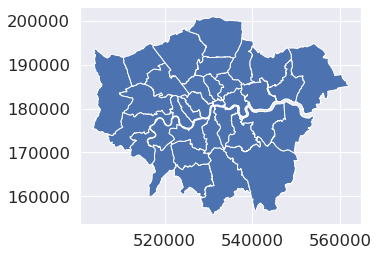

In [53]:
map_df.plot()

In [54]:
df2 = df = pd.read_csv('borough_data.csv',low_memory=False)

In [55]:
merged = map_df.set_index('GSS_CODE').join(df2.set_index('GSS_CODE'))
merged.head()

,NAME,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,London_borough,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
GSS_CODE,,,,,,,,,,,,,,,,,,,
E09000021,Kingston upon Thames,"3,726.1170000",0.0000000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,487328,2.8100000,50500,33500,78.2000000,326034,5.0500000,6.7500000,51,58.9000000,11.6600000
E09000008,Croydon,"8,649.4410000",0.0000000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,365678,2.9300000,37800,29400,76.1000000,341806,4.2800000,4.8500000,67,48.9000000,22.7600000
E09000006,Bromley,"15,013.4870000",0.0000000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,436486,2.8800000,48200,33700,79.3000000,332336,2.1400000,4.2000000,61,54.5000000,14.9500000
E09000018,Hounslow,"5,658.5410000",60.7550000,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,401072,3.1400000,41700,27500,71.8000000,242467,10.3700000,5.0000000,69,52.6000000,21.8400000
E09000009,Ealing,"5,554.4280000",0.0000000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,472620,3.4000000,42700,28200,73.0000000,333794,17.8000000,4.7500000,70,53.5000000,25.0100000


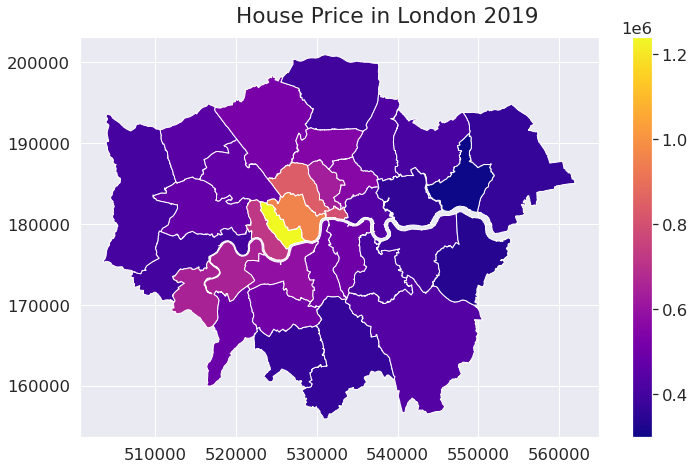

In [56]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
merged.plot(column='housing_price', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle('House Price in London 2019');

In [57]:
df3 = pd.read_csv('borough_data_residual.csv',low_memory=False)

In [58]:
merged2 = map_df.set_index('GSS_CODE').join(df3.set_index('GSS_CODE'))
merged2.head()

,NAME,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,London_borough,residual
GSS_CODE,,,,,,,,,
E09000021,Kingston upon Thames,"3,726.1170000",0.0000000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,"24,207.1844800"
E09000008,Croydon,"8,649.4410000",0.0000000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,626.3138065
E09000006,Bromley,"15,013.4870000",0.0000000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,"7,986.0641180"
E09000018,Hounslow,"5,658.5410000",60.7550000,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,"-6,696.2305050"
E09000009,Ealing,"5,554.4280000",0.0000000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,"30,264.5835000"


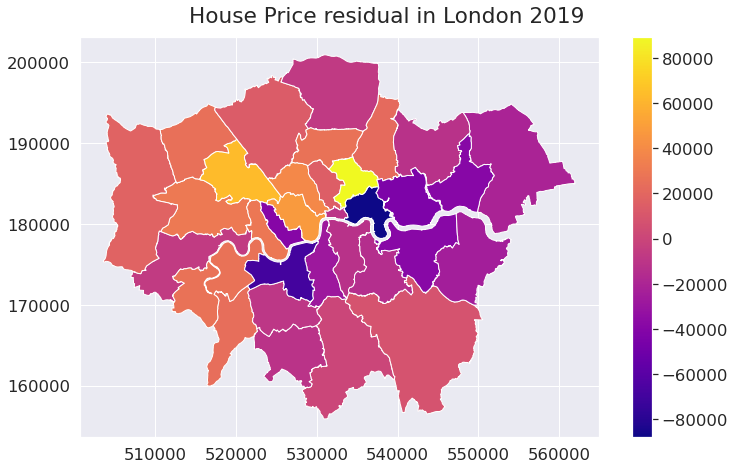

In [59]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
merged2.plot(column='residual', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle('House Price residual in London 2019');

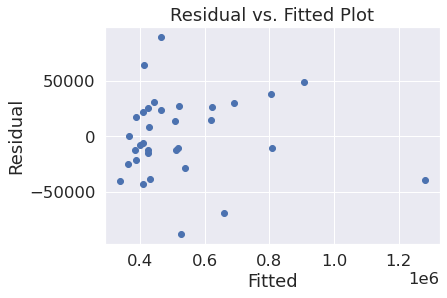

In [60]:
# plot 
plt.scatter(model_final2.fittedvalues, model_final2.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

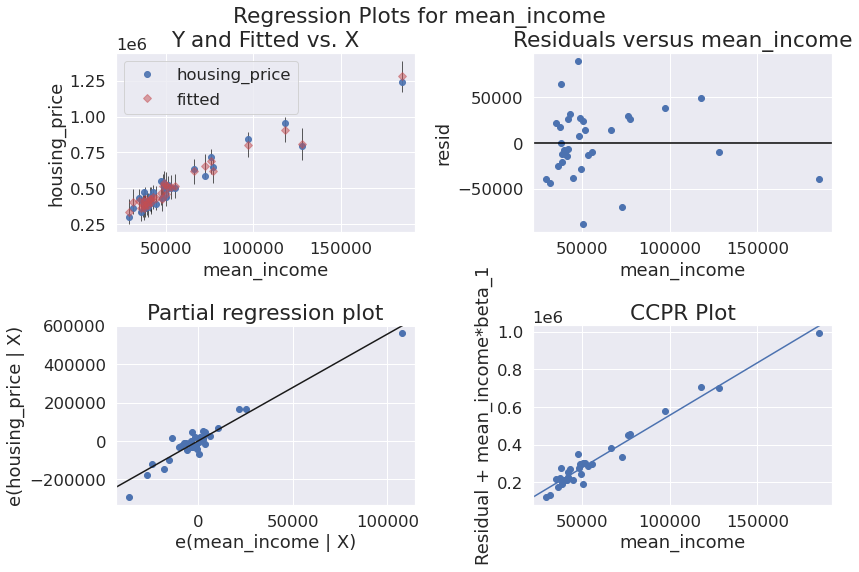

In [61]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'mean_income', fig=fig)

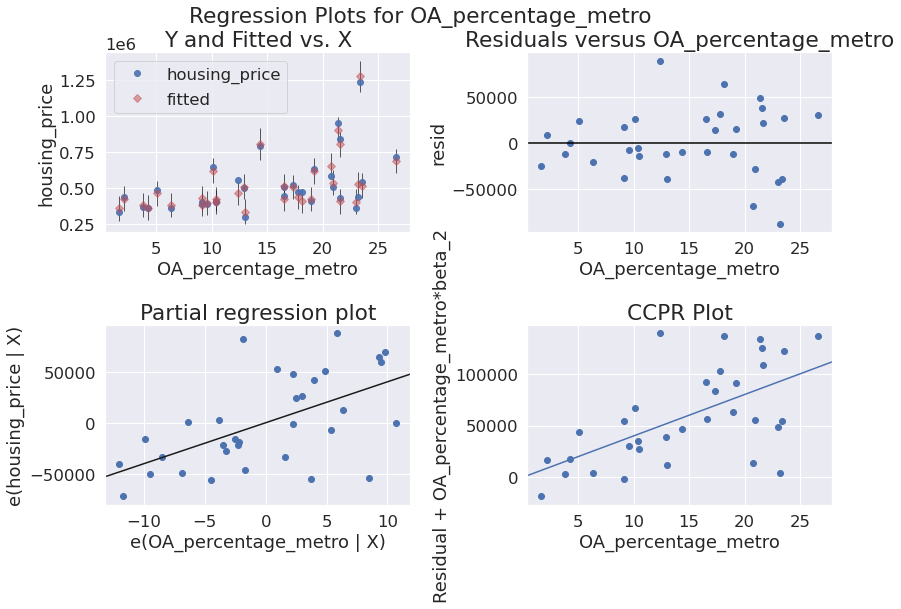

In [62]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'OA_percentage_metro', fig=fig)

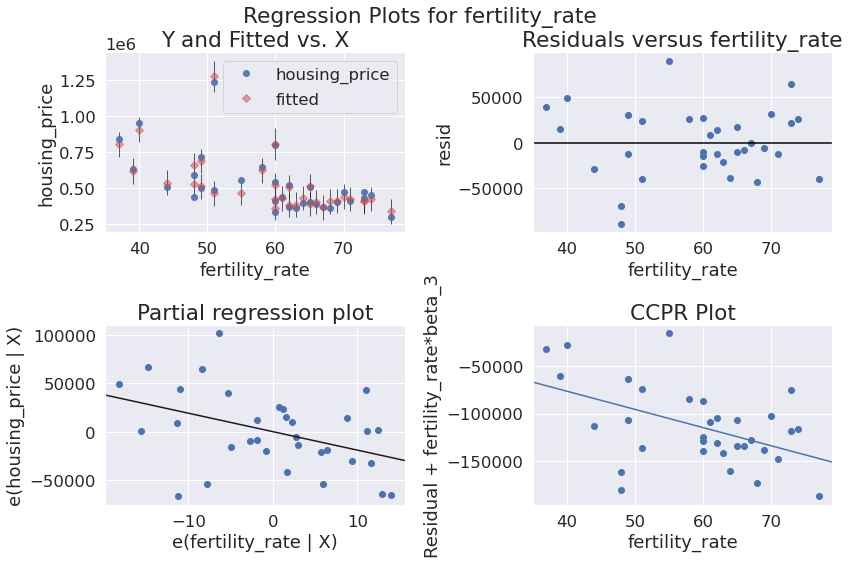

In [63]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'fertility_rate', fig=fig)

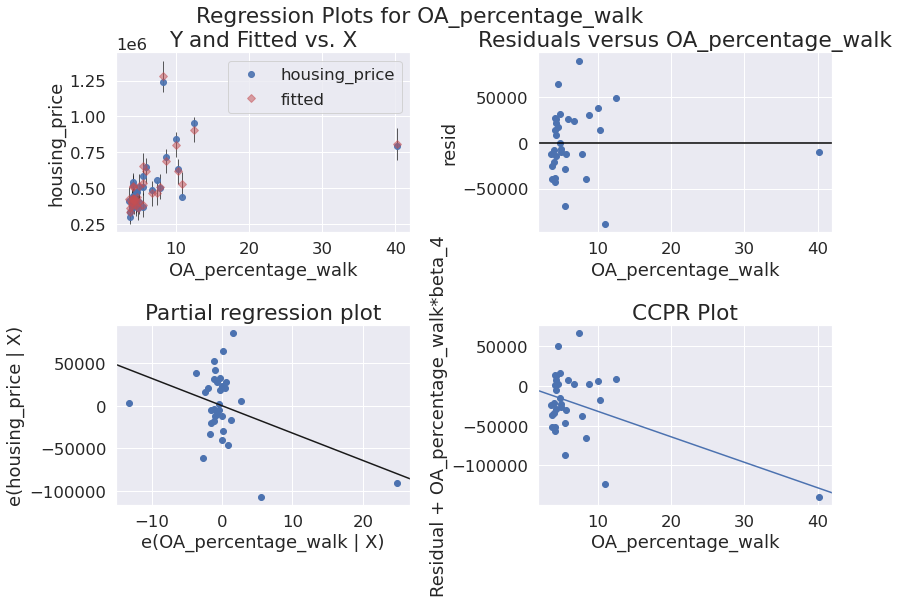

In [64]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'OA_percentage_walk', fig=fig)

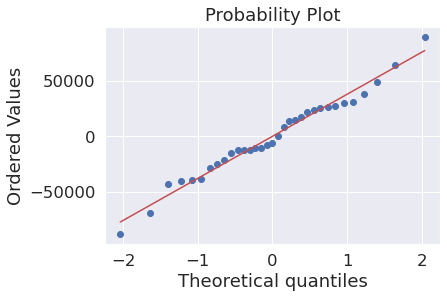

In [65]:
resid = model_final2.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

In [66]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt
import sklearn.metrics as sklm

import libpysal
import warnings

In [67]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

In [68]:
df = pd.read_csv('borough_data.csv')
ppd = pd.merge(map_df, df, left_on='GSS_CODE', right_on='GSS_CODE', how='inner').reset_index()
ppd.shape

(33, 21)

In [69]:
ppd.head()

,index,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,London_borough,...,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
0,0,Kingston upon Thames,E09000021,"3,726.1170000",0.0000000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,...,2.8100000,50500,33500,78.2000000,326034,5.0500000,6.7500000,51,58.9000000,11.6600000
1,1,Croydon,E09000008,"8,649.4410000",0.0000000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,...,2.9300000,37800,29400,76.1000000,341806,4.2800000,4.8500000,67,48.9000000,22.7600000
2,2,Bromley,E09000006,"15,013.4870000",0.0000000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,...,2.8800000,48200,33700,79.3000000,332336,2.1400000,4.2000000,61,54.5000000,14.9500000
3,3,Hounslow,E09000018,"5,658.5410000",60.7550000,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,...,3.1400000,41700,27500,71.8000000,242467,10.3700000,5.0000000,69,52.6000000,21.8400000
4,4,Ealing,E09000009,"5,554.4280000",0.0000000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,...,3.4000000,42700,28200,73.0000000,333794,17.8000000,4.7500000,70,53.5000000,25.0100000


In [70]:
raw = ppd[['GSS_CODE','Personal_wellbeing_average_score','mean_income', 'median_income','employment_rate','population','OA_percentage_metro','OA_percentage_walk','fertility_rate','gcse_results','IMD_score','housing_price']].set_index('GSS_CODE').copy()
raw.head()

,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score,housing_price
GSS_CODE,,,,,,,,,,,
E09000021,2.8100000,50500,33500,78.2000000,326034,5.0500000,6.7500000,51,58.9000000,11.6600000,487328
E09000008,2.9300000,37800,29400,76.1000000,341806,4.2800000,4.8500000,67,48.9000000,22.7600000,365678
E09000006,2.8800000,48200,33700,79.3000000,332336,2.1400000,4.2000000,61,54.5000000,14.9500000,436486
E09000018,3.1400000,41700,27500,71.8000000,242467,10.3700000,5.0000000,69,52.6000000,21.8400000,401072
E09000009,3.4000000,42700,28200,73.0000000,333794,17.8000000,4.7500000,70,53.5000000,25.0100000,472620


In [71]:
normed = raw.copy()
for c in raw.columns.values:
    normed[c] = rs.fit_transform(raw[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of Personal_wellbeing_average_score is [-1.1480362537764355, 0.891238670694864]
The range of mean_income is [-0.3137116672541416, 2.4286217835741977]
The range of median_income is [-0.49295774647887325, 2.112676056338028]
The range of employment_rate is [-0.8994197292069627, 1.1605415860735007]
The range of population is [-1.7527055049204714, 0.779654970246332]
The range of OA_percentage_metro is [-0.7909333333333335, 0.5413333333333333]
The range of OA_percentage_walk is [-0.19604666234607898, 5.722618276085547]
The range of fertility_rate is [-0.8633093525179857, 0.5755395683453238]
The range of gcse_results is [-0.5731707317073177, 1.0]
The range of IMD_score is [-0.67566305565932, 0.8545013074336943]
The range of housing_price is [-0.41799637459221356, 1.843890170962105]


,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score,housing_price
GSS_CODE,,,,,,,,,,,
E09000021,-0.4380665,0.0581600,0.2904930,0.2901354,0.3216767,-0.6106667,0.3078419,-0.3597122,0.7073171,-0.6037542,0.0352755
E09000008,-0.2567976,-0.1656680,-0.0704225,0.0870406,0.4251096,-0.6517333,0.0000000,0.2158273,-0.5121951,-0.0854501,-0.2564887
E09000006,-0.3323263,0.0176243,0.3080986,0.3965184,0.3630052,-0.7658667,-0.1053143,0.0000000,0.1707317,-0.4501307,-0.0866635
E09000018,0.0604230,-0.0969334,-0.2376761,-0.3288201,-0.2263561,-0.3269333,0.0243033,0.2877698,-0.0609756,-0.1284087,-0.1716001
E09000009,0.4531722,-0.0793091,-0.1760563,-0.2127660,0.3725668,0.0693333,-0.0162022,0.3237410,0.0487805,0.0196115,0.0000000


In [72]:
k_range = range(1,11)
cluster_ids_series = [np.nan]
cluster_sse_series = [np.nan]
cluster_cns_series = [np.nan]
cluster_shs_series = [np.nan]

for k in k_range:
    
    km_output = sklearn.cluster.KMeans(n_clusters = k, n_init = 100).fit(normed)
    
    cluster_ids_series.append(km_output.labels_)
    cluster_sse_series.append(km_output.inertia_)
    cluster_cns_series.append(km_output.cluster_centers_)
    
    try:
        cluster_shs_series.append(sklm.silhouette_score(normed,km_output.labels_))
    except:
        cluster_shs_series.append(0)
        
report_dict = {'SSE':cluster_sse_series, 'Silhouette Score':cluster_shs_series}
report_df = pd.DataFrame(report_dict, index = range(11))
report_df = report_df.dropna(how ='any')

optimal_k_by_silhouette_score = report_df['Silhouette Score'].argmax()
optimal_silhouette_score = report_df.loc[optimal_k_by_silhouette_score, 'Silhouette Score']

report_df

,SSE,Silhouette Score
1,103.2038903,0.0000000
2,62.3120813,0.6928006
3,42.1673724,0.3003374
4,33.4089490,0.2205251
5,26.3384018,0.2229625
6,22.9354093,0.2148320
7,20.3591229,0.1534131
8,18.0839680,0.1639546
9,15.9595778,0.1851845
10,14.4199019,0.1879767


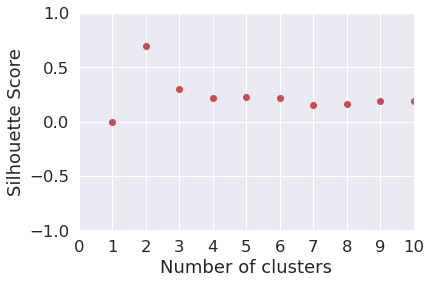

In [73]:
fignum = 11
plt.plot(report_df.index,report_df['Silhouette Score'],'ro')

plt.gca().set_xlim([0,10])
plt.gca().set_xticks(range(11))
plt.gca().set_ylim([-1,1])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

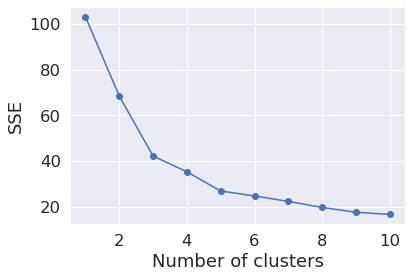

In [74]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normed)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [75]:
def mapping_clusters(labels_cluster):
    ppd['cluster_nm'] = labels_cluster
    ppd.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

[[-1.41616314e-03  1.36698097e-01  1.18562940e-01 -7.10227273e-02
   1.82009228e-02 -9.48000000e-02  1.56452528e-01 -5.95773381e-02
   2.24847561e-02  3.46411561e-02  1.00850092e-01]
 [ 0.00000000e+00  1.42403948e+00  2.11267606e+00  1.16054159e+00
  -1.75270550e+00 -1.15733333e-01  5.72261828e+00 -3.59712230e-02
  -1.21951220e-02 -6.27568173e-01  7.79201249e-01]]


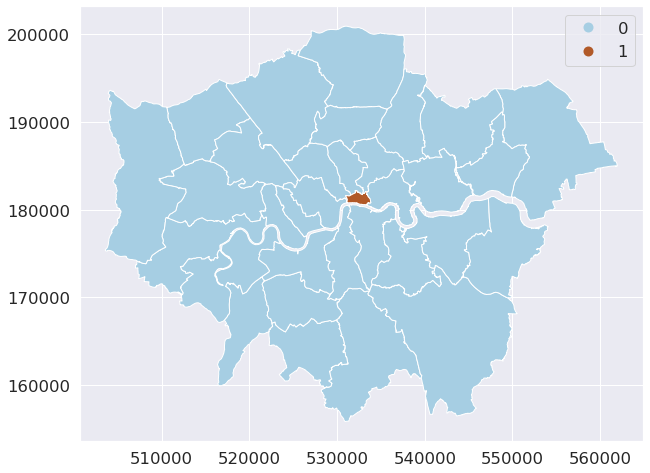

In [76]:
k_cluster = 2
random_seed = 12
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)
clustering_center= kmeans_method.cluster_centers_
print(clustering_center)

# plotting
mapping_clusters(kmeans_method.labels_);

[[ 4.86740517e-01  7.23377590e-01  6.24021909e-01  1.71932087e-02
  -1.03096938e-01  1.68948148e-01  5.53755311e-01 -5.35571543e-01
   1.13821138e-01  4.10907733e-02  6.35581868e-01]
 [-1.92433994e-01 -9.28721399e-02 -7.92253521e-02 -1.05542007e-01
   6.56653030e-02 -1.98005797e-01  9.86221083e-04  1.26681264e-01
  -1.32555673e-02  3.21173929e-02 -1.08392777e-01]
 [ 0.00000000e+00  1.42403948e+00  2.11267606e+00  1.16054159e+00
  -1.75270550e+00 -1.15733333e-01  5.72261828e+00 -3.59712230e-02
  -1.21951220e-02 -6.27568173e-01  7.79201249e-01]]


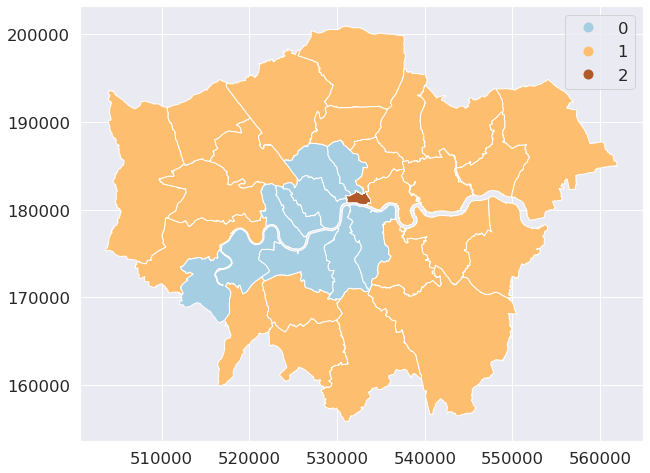

In [77]:
k_cluster = 3
random_seed = 123
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)
clustering_center= kmeans_method.cluster_centers_
print(clustering_center)
# plotting
mapping_clusters(kmeans_method.labels_);

In [78]:
#cluster 0 borough data
df = pd.read_csv('borough_clusterzero.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GSS_CODE                          9 non-null      object 
 1   London_borough                    9 non-null      object 
 2   housing_price                     9 non-null      int64  
 3   Personal_wellbeing_average_score  9 non-null      float64
 4   mean_income                       9 non-null      int64  
 5   median_income                     9 non-null      int64  
 6   employment_rate                   9 non-null      float64
 7   population                        9 non-null      int64  
 8   OA_percentage_metro               9 non-null      float64
 9   OA_percentage_walk                9 non-null      float64
 10  fertility_rate                    9 non-null      int64  
 11  gcse_results                      9 non-null      float64
 12  IMD_score   

In [80]:
df.head()

,GSS_CODE,London_borough,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
0,E09000007,Camden,843067,3.3000000,96900,38200,70.2000000,270029,21.6000000,10.0000000,37,52.2000000,25.4300000
1,E09000013,Hammersmith & Fulham,718997,3.4500000,75900,35800,75.8000000,268647,26.6500000,8.7100000,49,56.1000000,27.4800000
2,E09000019,Islington,633667,3.2300000,66100,36400,77.1000000,156129,19.2300000,10.2400000,39,49.7000000,35.8700000
3,E09000020,Kensington & Chelsea,1241423,3.6900000,185000,42100,65.9000000,177507,23.3900000,8.2900000,51,58.0000000,23.3100000
4,E09000022,Lambeth,508149,3.6700000,49100,31900,78.2000000,305842,20.9500000,5.4900000,44,49.3000000,31.2400000


In [81]:
df.describe()

,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
count,9.0000000,9.0000000,9.0000000,9.0000000,9.0000000,9.0000000,9.0000000,9.0000000,9.0000000,9.0000000,9.0000000
mean,"737,623.4444444",3.4222222,"88,244.4444444","37,288.8888889",75.3777778,"261,262.2222222",19.6677778,8.2677778,46.1111111,54.0333333,25.4700000
std,"240,627.3351929",0.1954979,"41,952.0294834","3,209.1449190",5.1610992,"72,675.0804519",5.1001955,2.3864659,6.7164806,3.3139855,7.2524548
min,"499,370.0000000",3.1500000,"49,100.0000000","31,900.0000000",65.9000000,"156,129.0000000",10.1400000,5.4900000,37.0000000,49.3000000,10.1200000
25%,"588,496.0000000",3.3000000,"66,100.0000000","35,800.0000000",71.3000000,"206,349.0000000",19.2300000,5.8900000,40.0000000,52.2000000,23.3100000
50%,"649,443.0000000",3.3600000,"75,900.0000000","38,200.0000000",77.1000000,"268,647.0000000",20.9500000,8.2900000,48.0000000,53.7000000,25.4300000
75%,"843,067.0000000",3.6100000,"96,900.0000000","38,900.0000000",78.2000000,"305,842.0000000",21.6000000,10.0000000,49.0000000,57.1000000,29.7300000
max,"1,241,423.0000000",3.6900000,"185,000.0000000","42,100.0000000",81.3000000,"386,710.0000000",26.6500000,12.4500000,58.0000000,58.0000000,35.8700000


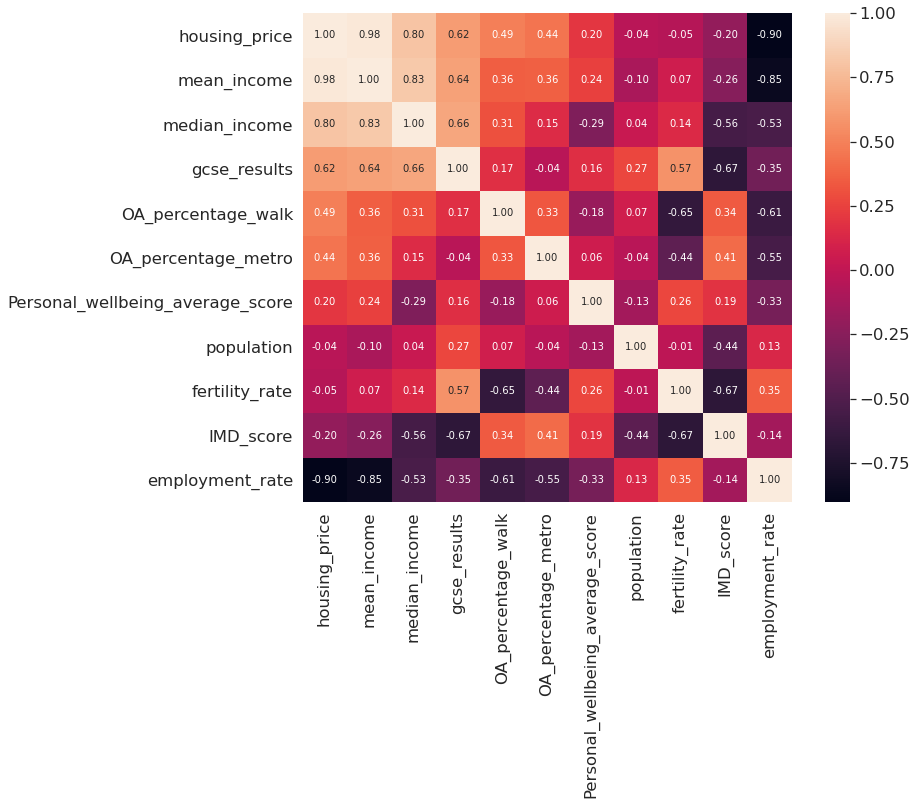

In [82]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [83]:
df.corrwith(df.housing_price)

housing_price                                                     1.0000000
Personal_wellbeing_average_score                                  0.1970178
mean_income                                                       0.9818357
median_income                                                     0.8040655
employment_rate                                                  -0.9039108
population                                                       -0.0379995
OA_percentage_metro                                               0.4431213
OA_percentage_walk                                                0.4919709
fertility_rate                                                   -0.0526448
gcse_results                                                      0.6184671
IMD_score                                                        -0.1998865
dtype: float64

In [84]:
# backward selection
df_40 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','median_income','employment_rate','IMD_score','population']]

model_40 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + median_income + employment_rate + IMD_score + population', df_40).fit()
model_40.summary()

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 30 Jan 2023   Prob (F-statistic):                nan
Time:                        12:14:56   Log-Likelihood:                 116.32
No. Observations:                   9   AIC:                            -214.6
Df Residuals:                       0   BIC:                            -212.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         7881.6482        inf          0        nan         nan         nan
mean_income                         16.7088        inf          0        nan         nan         nan
OA_percentage_metro               1.779e+04        inf          0        nan         nan         nan
fertility_rate                   -4.796e+04        inf         -0        nan         nan         nan
OA_percentage_walk                4.645e+04        inf          0        nan         nan         nan
gcse_results                      2.989e+04        inf          0        nan         nan         nan
Personal_wellbeing_average_score  4.344e+04        inf          0        nan         nan         nan
median_income                     -133.1968        inf         -0        nan         nan         nan
employment_rate                   7.582e+04        inf          0        nan         nan         nan
IMD_score                        -4.774e+04        inf         -0        nan         nan         nan
population                          -2.1546        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                       16.453   Durbin-Watson:                   0.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.617
Skew:                          -1.897   Prob(JB):                       0.0222
Kurtosis:                       5.432   Cond. No.                     1.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
#cluster 1
df = pd.read_csv('borough_clusterone.csv')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GSS_CODE                          23 non-null     object 
 1   London_borough                    23 non-null     object 
 2   housing_price                     23 non-null     int64  
 3   Personal_wellbeing_average_score  23 non-null     float64
 4   mean_income                       23 non-null     int64  
 5   median_income                     23 non-null     int64  
 6   employment_rate                   23 non-null     float64
 7   population                        23 non-null     int64  
 8   OA_percentage_metro               23 non-null     float64
 9   OA_percentage_walk                23 non-null     float64
 10  fertility_rate                    23 non-null     int64  
 11  gcse_results                      23 non-null     float64
 12  IMD_score 

In [87]:
df.head()

,GSS_CODE,London_borough,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
0,E09000002,Barking & Dagenham,298338,2.8200000,29400,25700,69.8000000,212906,13.0100000,3.7100000,77,49.7000000,34.2000000
1,E09000003,Barnet,520524,3.1900000,51600,30700,73.9000000,395869,17.3200000,4.1000000,62,60.1000000,16.6400000
2,E09000004,Bexley,336988,3.2100000,36000,28000,75.6000000,248287,1.6700000,3.7000000,60,53.5000000,16.7100000
3,E09000005,Brent,474732,2.4000000,37800,26200,72.8000000,329771,18.1500000,4.5600000,73,53.1000000,30.5000000
4,E09000006,Bromley,436486,2.8800000,48200,33700,79.3000000,332336,2.1400000,4.2000000,61,54.5000000,14.9500000


In [88]:
df.describe()

,housing_price,Personal_wellbeing_average_score,mean_income,median_income,employment_rate,population,OA_percentage_metro,OA_percentage_walk,fertility_rate,gcse_results,IMD_score
count,23.0000000,23.0000000,23.0000000,23.0000000,23.0000000,23.0000000,23.0000000,23.0000000,23.0000000,23.0000000,23.0000000
mean,"427,426.0434783",2.9726087,"41,930.4347826","29,300.0000000",74.1086957,"286,996.0000000",12.7873913,4.8560870,64.5217391,52.9913043,25.2778261
std,"66,584.2800029",0.2615551,"6,641.2919596","2,340.1631645",3.8106207,"55,165.3749878",7.0357168,1.6047394,7.1913431,3.4057322,9.7439394
min,"298,338.0000000",2.3400000,"29,400.0000000","24,600.0000000",65.9000000,"185,143.0000000",1.6700000,3.6400000,48.0000000,48.4000000,11.6600000
25%,"382,333.5000000",2.8500000,"37,800.0000000","28,050.0000000",71.6000000,"249,723.5000000",7.7300000,4.0800000,60.5000000,50.1500000,16.6350000
50%,"411,968.0000000",3.0300000,"41,100.0000000","29,400.0000000",73.9000000,"287,942.0000000",12.4000000,4.2400000,65.0000000,53.1000000,22.7600000
75%,"473,676.0000000",3.1350000,"47,700.0000000","30,250.0000000",76.8500000,"329,724.0000000",17.9750000,4.8850000,69.5000000,53.5000000,33.0700000
max,"554,933.0000000",3.4000000,"55,300.0000000","33,700.0000000",80.3000000,"395,869.0000000",23.5800000,10.9000000,77.0000000,61.3000000,42.8900000


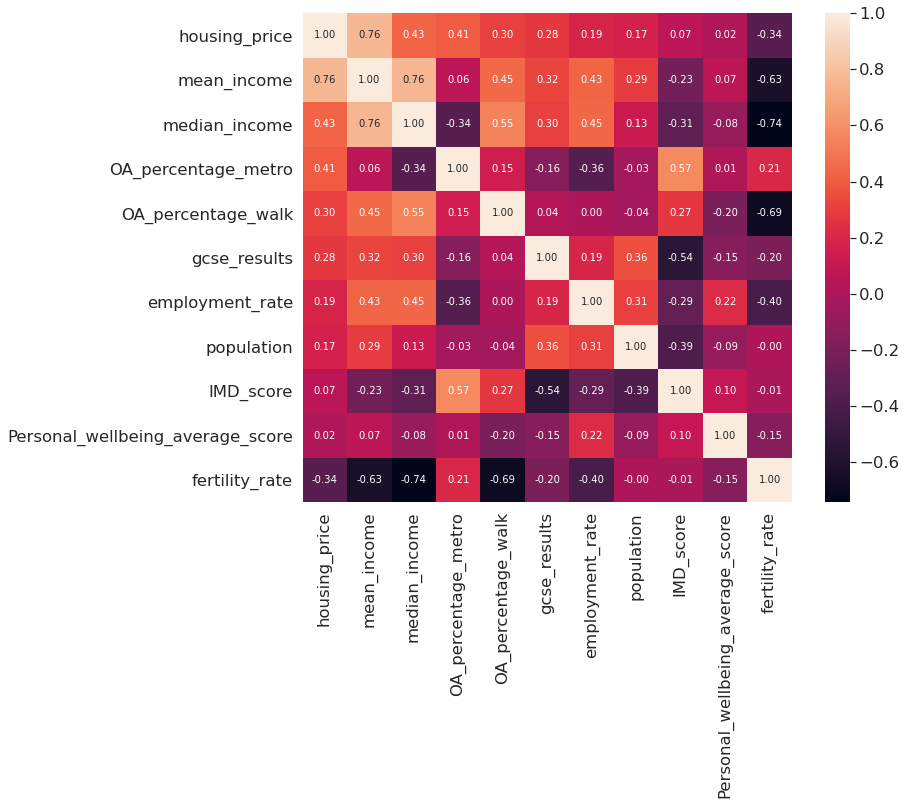

In [89]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [90]:
df.corrwith(df.housing_price)

housing_price                                                     1.0000000
Personal_wellbeing_average_score                                  0.0185749
mean_income                                                       0.7644702
median_income                                                     0.4325508
employment_rate                                                   0.1850226
population                                                        0.1747054
OA_percentage_metro                                               0.4055293
OA_percentage_walk                                                0.3012652
fertility_rate                                                   -0.3421165
gcse_results                                                      0.2763461
IMD_score                                                         0.0658662
dtype: float64

In [91]:
# backward selection
df_41 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','median_income','employment_rate','IMD_score','population']]

model_41 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + median_income + employment_rate + IMD_score + population', df_41).fit()
model_41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     4.052
Date:                Mon, 30 Jan 2023   Prob (F-statistic):             0.0126
Time:                        12:15:12   Log-Likelihood:                -270.59
No. Observations:                  23   AIC:                             563.2
Df Residuals:                      12   BIC:                             575.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -2.34e+05   5.61e+05     -0.417      0.684   -1.46e+06    9.89e+05
mean_income                          8.9443      3.076      2.908      0.013       2.243      15.645
OA_percentage_metro               2039.2963   2477.901      0.823      0.427   -3359.587    7438.180
fertility_rate                     919.4203   2920.316      0.315      0.758   -5443.402    7282.242
OA_percentage_walk               -9177.6290    1.1e+04     -0.837      0.419   -3.31e+04    1.47e+04
gcse_results                      4335.0329   3593.405      1.206      0.251   -3494.323    1.22e+04
Personal_wellbeing_average_score -1.592e+04   4.35e+04     -0.366      0.721   -1.11e+05    7.89e+04
median_income                        2.1781      9.347      0.233      0.820     -18.186      22.542
employment_rate                   -633.0560   3320.199     -0.191      0.852   -7867.148    6601.036
IMD_score                         2302.6287   1801.879      1.278      0.225   -1623.329    6228.586
population                          -0.0415      0.204     -0.203      0.842      -0.486       0.403
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.449
Skew:                           0.004   Prob(JB):                        0.799
Kurtosis:                       2.316   Cond. No.                     1.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
df_42 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','median_income','IMD_score','population']]

model_42 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + median_income + IMD_score + population', df_42).fit()
model_42.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     4.858
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00536
Time:                        12:15:13   Log-Likelihood:                -270.63
No. Observations:                  23   AIC:                             561.3
Df Residuals:                      13   BIC:                             572.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -2.774e+05   4.94e+05     -0.562      0.584   -1.34e+06     7.9e+05
mean_income                          8.8305      2.903      3.042      0.009       2.559      15.102
OA_percentage_metro               2149.4014   2318.643      0.927      0.371   -2859.722    7158.525
fertility_rate                    1023.1062   2760.847      0.371      0.717   -4941.341    6987.553
OA_percentage_walk               -8585.0834   1.01e+04     -0.848      0.412   -3.05e+04    1.33e+04
gcse_results                      4349.7431   3456.860      1.258      0.230   -3118.349    1.18e+04
Personal_wellbeing_average_score -1.672e+04   4.17e+04     -0.401      0.695   -1.07e+05    7.34e+04
median_income                        2.0523      8.971      0.229      0.823     -17.328      21.433
IMD_score                         2256.0484   1717.800      1.313      0.212   -1455.034    5967.131
population                          -0.0532      0.187     -0.284      0.781      -0.457       0.351
==============================================================================
Omnibus:                        0.201   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.407
Skew:                           0.001   Prob(JB):                        0.816
Kurtosis:                       2.349   Cond. No.                     1.70e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
df_43 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','IMD_score','population']]

model_43 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + IMD_score + population', df_43).fit()
model_43.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     5.855
Date:                Mon, 30 Jan 2023   Prob (F-statistic):            0.00210
Time:                        12:15:14   Log-Likelihood:                -270.67
No. Observations:                  23   AIC:                             559.3
Df Residuals:                      14   BIC:                             569.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -2.173e+05   4.04e+05     -0.538      0.599   -1.08e+06    6.49e+05
mean_income                          9.2587      2.142      4.322      0.001       4.664      13.854
OA_percentage_metro               1922.6388   2023.901      0.950      0.358   -2418.197    6263.474
fertility_rate                     889.9305   2605.835      0.342      0.738   -4699.029    6478.891
OA_percentage_walk               -8050.7984   9509.457     -0.847      0.411   -2.84e+04    1.23e+04
gcse_results                      4344.3990   3337.736      1.302      0.214   -2814.333    1.15e+04
Personal_wellbeing_average_score -1.876e+04   3.93e+04     -0.477      0.641   -1.03e+05    6.56e+04
IMD_score                         2229.4219   1654.831      1.347      0.199   -1319.838    5778.681
population                          -0.0599      0.178     -0.336      0.742      -0.443       0.323
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.409
Skew:                          -0.000   Prob(JB):                        0.815
Kurtosis:                       2.347   Cond. No.                     1.43e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
df_44 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','fertility_rate','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','IMD_score']]

model_44 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + fertility_rate + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + IMD_score', df_44).fit()
model_44.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     7.095
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           0.000765
Time:                        12:15:15   Log-Likelihood:                -270.76
No. Observations:                  23   AIC:                             557.5
Df Residuals:                      15   BIC:                             566.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -2.186e+05   3.92e+05     -0.558      0.585   -1.05e+06    6.16e+05
mean_income                          9.1307      2.045      4.465      0.000       4.772      13.490
OA_percentage_metro               1867.4860   1956.669      0.954      0.355   -2303.055    6038.027
fertility_rate                     808.1514   2516.548      0.321      0.753   -4555.743    6172.045
OA_percentage_walk               -8108.1054   9222.477     -0.879      0.393   -2.78e+04    1.15e+04
gcse_results                      4198.0751   3209.843      1.308      0.211   -2643.543     1.1e+04
Personal_wellbeing_average_score -1.852e+04   3.81e+04     -0.486      0.634   -9.98e+04    6.28e+04
IMD_score                         2337.1385   1574.728      1.484      0.158   -1019.314    5693.591
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.252
Skew:                           0.025   Prob(JB):                        0.882
Kurtosis:                       2.490   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
df_45 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','OA_percentage_walk','gcse_results','Personal_wellbeing_average_score','IMD_score']]

model_45 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + OA_percentage_walk + gcse_results + Personal_wellbeing_average_score + IMD_score', df_45).fit()
model_45.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     8.750
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           0.000250
Time:                        12:15:15   Log-Likelihood:                -270.84
No. Observations:                  23   AIC:                             555.7
Df Residuals:                      16   BIC:                             563.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -1.116e+05      2e+05     -0.557      0.585   -5.36e+05    3.13e+05
mean_income                          8.7657      1.652      5.307      0.000       5.264      12.267
OA_percentage_metro               2249.3451   1509.722      1.490      0.156    -951.124    5449.814
OA_percentage_walk               -1.001e+04   6871.402     -1.457      0.165   -2.46e+04    4557.832
gcse_results                      3909.4287   2993.817      1.306      0.210   -2437.181    1.03e+04
Personal_wellbeing_average_score -2.368e+04   3.36e+04     -0.705      0.491   -9.49e+04    4.76e+04
IMD_score                         2157.7022   1430.404      1.508      0.151    -874.620    5190.024
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.200
Skew:                           0.108   Prob(JB):                        0.905
Kurtosis:                       2.598   Cond. No.                     1.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
df_46 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','OA_percentage_walk','gcse_results','IMD_score']]

model_46 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + OA_percentage_walk + gcse_results + IMD_score', df_46).fit()
model_46.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     10.72
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           8.83e-05
Time:                        12:15:16   Log-Likelihood:                -271.19
No. Observations:                  23   AIC:                             554.4
Df Residuals:                      17   BIC:                             561.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.802e+05   1.73e+05     -1.044      0.311   -5.44e+05    1.84e+05
mean_income             8.4011      1.545      5.437      0.000       5.141      11.661
OA_percentage_metro  2391.9122   1473.773      1.623      0.123    -717.476    5501.301
OA_percentage_walk  -8288.8872   6327.245     -1.310      0.208   -2.16e+04    5060.433
gcse_results         4078.1565   2939.688      1.387      0.183   -2124.043    1.03e+04
IMD_score            1933.7967   1373.840      1.408      0.177    -964.753    4832.346
==============================================================================
Omnibus:                        0.397   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.496
Skew:                           0.259   Prob(JB):                        0.780
Kurtosis:                       2.500   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
df_47 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','gcse_results','IMD_score']]

model_47 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + gcse_results + IMD_score', df_47).fit()
model_47.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     12.47
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.93e-05
Time:                        12:15:16   Log-Likelihood:                -272.30
No. Observations:                  23   AIC:                             554.6
Df Residuals:                      18   BIC:                             560.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.256e+05   1.71e+05     -0.736      0.471   -4.84e+05    2.33e+05
mean_income             7.2864      1.315      5.540      0.000       4.523      10.049
OA_percentage_metro  2790.3104   1470.463      1.898      0.074    -299.017    5879.638
gcse_results         3469.9998   2959.986      1.172      0.256   -2748.700    9688.700
IMD_score            1106.9964   1244.331      0.890      0.385   -1507.246    3721.239
==============================================================================
Omnibus:                        0.977   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.212
Skew:                          -0.196   Prob(JB):                        0.900
Kurtosis:                       3.260   Cond. No.                     9.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
df_48 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro','gcse_results']]

model_48 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro + gcse_results', df_48).fit()
model_48.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     16.55
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.57e-05
Time:                        12:15:17   Log-Likelihood:                -272.80
No. Observations:                  23   AIC:                             553.6
Df Residuals:                      19   BIC:                             558.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.808e+04    1.3e+05     -0.216      0.831      -3e+05    2.44e+05
mean_income             7.0770      1.287      5.500      0.000       4.384       9.770
OA_percentage_metro  3581.2614   1164.794      3.075      0.006    1143.320    6019.203
gcse_results         2131.9465   2535.350      0.841      0.411   -3174.603    7438.496
==============================================================================
Omnibus:                        3.248   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                1.564
Skew:                           0.427   Prob(JB):                        0.457
Kurtosis:                       3.949   Cond. No.                     7.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
df_49 = df.loc[:,['housing_price', 'mean_income','OA_percentage_metro']]

model_49 = sm.formula.ols('housing_price ~ mean_income + OA_percentage_metro', df_49).fit()
model_49.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     24.83
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.80e-06
Time:                        12:15:17   Log-Likelihood:                -273.22
No. Observations:                  23   AIC:                             552.4
Df Residuals:                      20   BIC:                             555.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7.202e+04   5.22e+04      1.379      0.183   -3.69e+04    1.81e+05
mean_income             7.4395      1.204      6.181      0.000       4.929       9.950
OA_percentage_metro  3399.1114   1136.063      2.992      0.007    1029.325    5768.898
==============================================================================
Omnibus:                        2.876   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                1.335
Skew:                           0.219   Prob(JB):                        0.513
Kurtosis:                       4.096   Cond. No.                     2.84e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
#cluster 0 MSOA data
df = pd.read_csv('MSOA_clusterzero.csv')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA11CD        249 non-null    object 
 1   MSOA            249 non-null    object 
 2   housing_price   249 non-null    int64  
 3   mean_income     249 non-null    int64  
 4   population      249 non-null    int64  
 5   fertility_rate  249 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 11.8+ KB


In [102]:
df.head()

,MSOA11CD,MSOA,housing_price,mean_income,population,fertility_rate
0,E02000166,Camden 001,1013792,55000,8238,39.3000000
1,E02000167,Camden 002,1782611,81600,8251,64.1000000
2,E02000168,Camden 003,893129,58100,8781,47.4000000
3,E02000169,Camden 004,1596253,75900,8555,67.1000000
4,E02000170,Camden 005,884116,65400,8751,61.6000000


In [103]:
df.describe()

,housing_price,mean_income,population,fertility_rate
count,249.0000000,249.0000000,249.0000000,249.0000000
mean,"843,017.1807229","56,973.4939759","8,635.3694779",62.4706827
std,"577,112.0583941","12,866.0758392","1,537.4052108",15.4953396
min,"281,046.0000000","34,700.0000000","5,359.0000000",15.5000000
25%,"491,540.0000000","46,900.0000000","7,617.0000000",52.2000000
50%,"659,300.0000000","55,400.0000000","8,504.0000000",61.2000000
75%,"991,794.0000000","66,000.0000000","9,497.0000000",71.9000000
max,"5,257,978.0000000","96,900.0000000","15,274.0000000",107.9000000


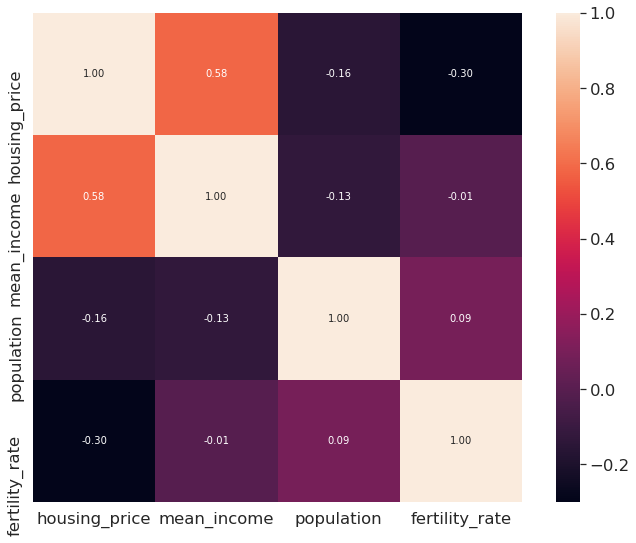

In [104]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [105]:
df.corrwith(df.housing_price)

housing_price                                   1.0000000
mean_income                                     0.5793556
population                                     -0.1550157
fertility_rate                                 -0.2992786
dtype: float64

In [106]:
# backward selection
df_50 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_50 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_50).fit()
model_50.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     60.58
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.47e-29
Time:                        12:15:32   Log-Likelihood:                -3586.9
No. Observations:                 249   AIC:                             7182.
Df Residuals:                     245   BIC:                             7196.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.343e+05   2.37e+05      0.989      0.323   -2.32e+05    7.01e+05
mean_income       25.5944      2.190     11.686      0.000      21.280      29.908
fertility_rate -1.083e+04   1810.836     -5.981      0.000   -1.44e+04   -7264.035
population       -20.0198     18.409     -1.088      0.278     -56.280      16.240
==============================================================================
Omnibus:                      159.797   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1715.529
Skew:                           2.389   Prob(JB):                         0.00
Kurtosis:                      14.938   Cond. No.                     5.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
df_51 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_51 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_51).fit()
model_51.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     90.21
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.12e-30
Time:                        12:15:33   Log-Likelihood:                -3587.5
No. Observations:                 249   AIC:                             7181.
Df Residuals:                     246   BIC:                             7192.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.515e+04    1.7e+05      0.324      0.746    -2.8e+05     3.9e+05
mean_income       25.9057      2.172     11.926      0.000      21.627      30.184
fertility_rate -1.101e+04   1803.630     -6.107      0.000   -1.46e+04   -7461.769
==============================================================================
Omnibus:                      155.441   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1540.327
Skew:                           2.334   Prob(JB):                         0.00
Kurtosis:                      14.255   Cond. No.                     3.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
df_54 = df.loc[:,['housing_price', 'mean_income']]

model_54 = sm.formula.ols('housing_price ~ mean_income', df_54).fit()
model_54.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     124.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.01e-23
Time:                        12:15:33   Log-Likelihood:                -3605.1
No. Observations:                 249   AIC:                             7214.
Df Residuals:                     247   BIC:                             7221.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.376e+05   1.36e+05     -4.693      0.000   -9.05e+05    -3.7e+05
mean_income    25.9872      2.326     11.171      0.000      21.405      30.569
==============================================================================
Omnibus:                      174.766   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2060.150
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      16.042   Cond. No.                     2.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
#cluster 1 MSOA data
df = pd.read_csv('MSOA_clusterone.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA11CD        733 non-null    object 
 1   MSOA            733 non-null    object 
 2   housing_price   733 non-null    int64  
 3   mean_income     733 non-null    int64  
 4   population      733 non-null    int64  
 5   fertility_rate  733 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 34.5+ KB


In [111]:
df.head()

,MSOA11CD,MSOA,housing_price,mean_income,population,fertility_rate
0,E02000002,Barking and Dagenham 001,218348,38600,7235,95.6000000
1,E02000003,Barking and Dagenham 002,233599,46400,10732,81.3000000
2,E02000004,Barking and Dagenham 003,239080,45300,6419,55.3000000
3,E02000005,Barking and Dagenham 004,222851,41000,9056,70.6000000
4,E02000007,Barking and Dagenham 006,199660,36200,9398,94.7000000


In [112]:
df.describe()

,housing_price,mean_income,population,fertility_rate
count,733.0000000,733.0000000,733.0000000,733.0000000
mean,"382,075.0341064","49,441.2005457","8,704.5156889",77.4342428
std,"181,770.4012555","9,160.9109409","1,667.7591978",19.7299920
min,"160,391.0000000","32,000.0000000","5,450.0000000",24.0000000
25%,"268,871.0000000","42,900.0000000","7,593.0000000",64.1000000
50%,"337,285.0000000","48,500.0000000","8,458.0000000",75.9000000
75%,"433,124.0000000","54,300.0000000","9,544.0000000",90.1000000
max,"2,157,017.0000000","105,700.0000000","15,867.0000000",174.8000000


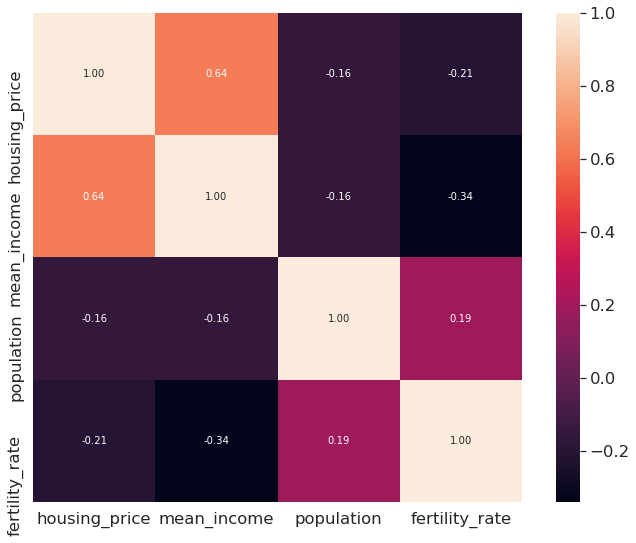

In [113]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [114]:
df.corrwith(df.housing_price)

housing_price                                   1.0000000
mean_income                                     0.6357981
population                                     -0.1595859
fertility_rate                                 -0.2052726
dtype: float64

In [115]:
# backward selection
df_52 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_52 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_52).fit()
model_52.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     167.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.19e-82
Time:                        12:15:46   Log-Likelihood:                -9724.3
No. Observations:                 733   AIC:                         1.946e+04
Df Residuals:                     729   BIC:                         1.947e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.944e+05   5.06e+04     -3.841      0.000   -2.94e+05   -9.51e+04
mean_income       12.5660      0.604     20.801      0.000      11.380      13.752
fertility_rate   206.1772    282.317      0.730      0.465    -348.074     760.429
population        -6.9768      3.181     -2.193      0.029     -13.222      -0.732
==============================================================================
Omnibus:                      569.792   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15929.435
Skew:                           3.227   Prob(JB):                         0.00
Kurtosis:                      24.907   Cond. No.                     4.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
df_53 = df.loc[:,['housing_price', 'mean_income','population']]

model_53 = sm.formula.ols('housing_price ~ mean_income + population', df_53).fit()
model_53.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     251.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           8.69e-84
Time:                        12:15:46   Log-Likelihood:                -9724.5
No. Observations:                 733   AIC:                         1.946e+04
Df Residuals:                     730   BIC:                         1.947e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.746e+05   4.27e+04     -4.091      0.000   -2.58e+05   -9.08e+04
mean_income    12.4252      0.572     21.711      0.000      11.302      13.549
population     -6.6268      3.144     -2.108      0.035     -12.798      -0.455
==============================================================================
Omnibus:                      570.658   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16066.124
Skew:                           3.232   Prob(JB):                         0.00
Kurtosis:                      25.006   Cond. No.                     4.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
df_55 = df.loc[:,['housing_price', 'mean_income']]

model_55 = sm.formula.ols('housing_price ~ mean_income', df_55).fit()
model_55.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     496.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           2.85e-84
Time:                        12:15:47   Log-Likelihood:                -9726.8
No. Observations:                 733   AIC:                         1.946e+04
Df Residuals:                     731   BIC:                         1.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.416e+05   2.85e+04     -8.484      0.000   -2.98e+05   -1.86e+05
mean_income    12.6155      0.566     22.271      0.000      11.503      13.728
==============================================================================
Omnibus:                      572.686   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16606.131
Skew:                           3.237   Prob(JB):                         0.00
Kurtosis:                      25.401   Cond. No.                     2.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""